In [ ]:
#Descomprimimos el archivo rar
!unrar x Perros_y_Gatos.rar

In [ ]:
#importamos librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Definimos los directorios
base_dir = 'Perros y Gatos'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_gatos_dir = os.path.join(train_dir, 'gatos')
train_perros_dir = os.path.join(train_dir, 'perros')

validation_gatos_dir = os.path.join(validation_dir, 'gatos')
validation_perros_dir = os.path.join(validation_dir, 'perros')

test_gatos_dir = os.path.join(test_dir, 'gatos')
test_perros_dir = os.path.join(test_dir, 'perros')

In [ ]:
len(os.listdir(train_perros_dir))

1000

In [ ]:
#importamos librerias de tensorflow
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#Procesamos las imagenes
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1. /255)
val_data = ImageDataGenerator(rescale=1. /255)
test_data = ImageDataGenerator(rescale=1. /255)

In [ ]:
#from keras.engine import training
#Cargamos los datos de las imagenes
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)
validation_set = val_data.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [ ]:
#from keras.engine import training
training_set.class_indices

{'gatos': 0, 'perros': 1}

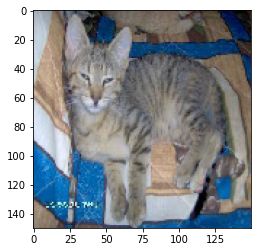

In [ ]:
#Visualizamos algunas imagenes
from keras.utils import load_img
fnames = [os.path.join(train_gatos_dir, fname) for
  fname in os.listdir(train_gatos_dir)]
img_path = fnames[666]
img = load_img(img_path, target_size=(150,150))

plt.figure()
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#construimos la red convolucional o algo asi
red = Sequential()
red.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(64, (3,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(128, (3,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(128, (3,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Flatten())
red.add(Dropout(0.5))
red.add(Dense(units=512, activation='relu'))
red.add(Dense(units=1, activation='sigmoid'))


In [ ]:
red.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
from keras import optimizers

In [ ]:
red.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-4),
            metrics=['accuracy', 'mse'])

In [ ]:
#from IPython.core import history
#Entrenamiento
history = red.fit(training_set,
                  steps_per_epoch=100,
                  epochs=30,
                  batch_size=50,
                  validation_data=validation_set,
                  validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 76ms/step - loss: 0.6941 - accuracy: 0.5125 - mse: 0.2505 - val_loss: 0.6892 - val_accuracy: 0.5970 - val_mse: 0.2480
Epoch 2/30
100/100 [==============================] - 7s 75ms/step - loss: 0.6887 - accuracy: 0.5415 - mse: 0.2478 - val_loss: 0.6811 - val_accuracy: 0.5350 - val_mse: 0.2440
Epoch 3/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6773 - accuracy: 0.5710 - mse: 0.2421 - val_loss: 0.6747 - val_accuracy: 0.5770 - val_mse: 0.2409
Epoch 4/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6682 - accuracy: 0.5840 - mse: 0.2377 - val_loss: 0.6617 - val_accuracy: 0.6100 - val_mse: 0.2346
Epoch 5/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6634 - accuracy: 0.6060 - mse: 0.2354 - val_loss: 0.6575 - val_accuracy: 0.6050 - val_mse: 0.2329
Epoch 6/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6528 - accuracy: 0.6200 - mse: 0.2304 - val_los

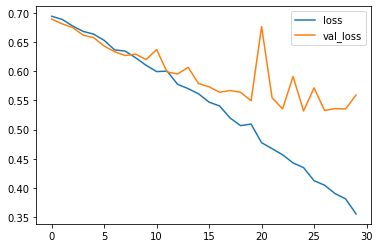

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

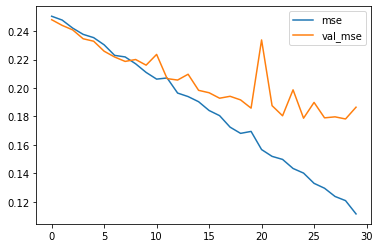

In [ ]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.legend()
plt.show()

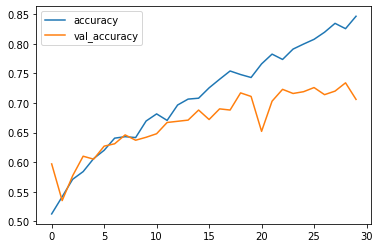

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
predict_set = red.predict(test_set)

1/1 [==============================] - 0s 200ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
red.evaluate(test_set)

1/1 [==============================] - 0s 34ms/step - loss: 0.6366 - accuracy: 0.5000 - mse: 0.2482


[0.6366269588470459, 0.5, 0.2482348382472992]

In [ ]:
#guardamos el modelo de red neuronal
red.save("RedCNN_PerrosyGatos.h5")

In [ ]:
nueva_red = keras.models.load_model("RedCNN_PerrosyGatos.h5")

In [ ]:
#Predecimos una sola image
path = "Perros y Gatos/validation/perros/dog.1004.jpg"
from keras.utils import load_img, img_to_array
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
print(img_tensor.shape)

(1, 150, 150, 3)


In [ ]:
#mostramos la imagen cargada
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
animal = nueva_red.predict(img_tensor)

In [ ]:
if np.round(animal[0][0])==1;
print("Perro")
else:
  print("Gato")